# Bonus Analysis

In [1]:
# import dependancies
import os 
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from config import dbname, username, password, server
import matplotlib.pyplot as plt

In [2]:
# connect to database
engine = create_engine(f'postgresql://{username}:{password}@{server}/{dbname}')
conn= engine.connect()

In [3]:
# review tables in database
# https://stackoverflow.com/questions/21310549/list-database-tables-with-sqlalchemy/21346185
m = MetaData()
m.reflect(engine)
for table in m.tables.values():
    print(table.name)

departments
dept_emp
dept_manager
employees
salaries
titles


In [4]:
# Create a histogram to visualize the most common salary ranges for employees.
salaries = pd.read_sql('SELECT * from salaries', conn)
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [5]:
print(salaries['salary'].min())
print(salaries['salary'].max())
print(len(salaries))

40000
129492
300024


Text(0.5, 0, 'Salaries for Pewlett Hackard')

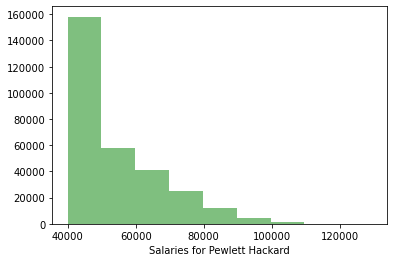

In [6]:
# https://datatofish.com/plot-histogram-python/
# https://realpython.com/python-histograms/
x = salaries['salary']
plt.hist(x, bins = 9, color ='green', alpha =.5)
plt.xlabel('Salaries for Pewlett Hackard')

The histogram shows over half of the 300k records falling into the 40-50K range

In [7]:
# Create a bar chart of average salary by title.
# first get unique titles from titles table
unique_titles = pd.read_sql("SELECT distinct title from titles", conn)
unique_titles 

,title
0,Engineer
1,Technique Leader
2,Manager
3,Assistant Engineer
4,Staff
5,Senior Engineer
6,Senior Staff


In [8]:
# test connection
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [9]:
# look at columns for title table, salaries above
title = pd.read_sql_table('titles', conn)
title.head(2)


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff


In [10]:
# look at columns for employees, need to join off title_id
emp = pd.read_sql_table('employees', conn)
print(len(emp))
emp.head(2)


300024


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07


In [12]:
# create query to join employee, salaries and titles to then get average
# https://stackoverflow.com/questions/51739196/using-jupyter-notebook-to-convert-sql-into-panda-data-frame

query = """
        SELECT e.emp_no, e.emp_title_id, t.title, s.salary
        FROM employees AS e
        LEFT JOIN titles AS t
            ON e.emp_title_id = t.title_id
        LEFT JOIN salaries AS s
            ON e.emp_no = s.emp_no
        
        """
combined_salary = pd.read_sql(query,conn)
len(combined_salary)
combined_salary.head()

,emp_no,emp_title_id,title,salary
0,57444,e0002,Engineer,48973
1,13616,e0003,Senior Engineer,40000
2,240129,e0004,Technique Leader,43548
3,427958,s0001,Staff,63377
4,35916,e0003,Senior Engineer,40000


In [13]:
# get averages by title
average_sal_by_title = combined_salary.groupby('title').mean()['salary']
average_sal_by_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0.5, 0, 'Title')

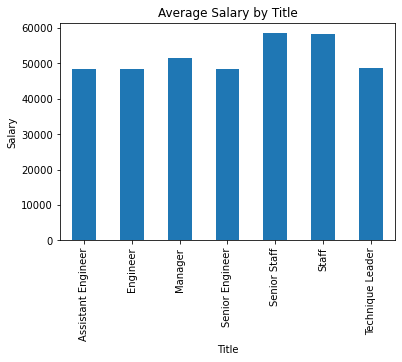

In [14]:
# place into bar chart
salary_bar = average_sal_by_title
salary_bar_plot = salary_bar.plot.bar(title = "Average Salary by Title")
salary_bar_plot.set_ylabel('Salary')
salary_bar_plot.set_xlabel('Title')

According to the above barchart there is very little difference in average salary amongst all positions. It appears an assistant engineer averages the same as a senior engineer which would mean no salary increase for a promotion.

In [18]:
# search employee name for 499942
emp_49942 = emp.loc[emp['emp_no']== 499942]
emp_49942

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


HAHA, "my" employee number replates to the employee April Foolsday. 